# Regresión Logística, Random Forest o KNN

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-19

**Fecha de actualización:** 2022-02-19

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.model_selection import train_test_split 

In [2]:
filename = 'data/wine.data'
data = pd.read_csv(filename, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 14)

In [4]:
# Lee e imprime el archivo con la descipción de los datos
dataNames = open("data/wine.names", "r")
print(dataNames.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [5]:
# Array con todos los nombres de las columnas del dataset
columNames =    ['Class',
                'Alcohol',
                'Malic acid',
                'Ash',
                'Alcalinity of ash',
                'Magnesium',
                'Total phenols',
                'Flavanoids',
                'Nonflavanoid phenols',
                'Proanthocyanins',
                'Color intensity',
                'Hue',
                'OD280/OD315 of diluted wines',
                'Proline']

In [6]:
data.columns = columNames

In [7]:
classLabel = 'Class'
predLabels = columNames.copy()
predLabels.remove(classLabel)
predLabels

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

## Correlaciones

<AxesSubplot:>

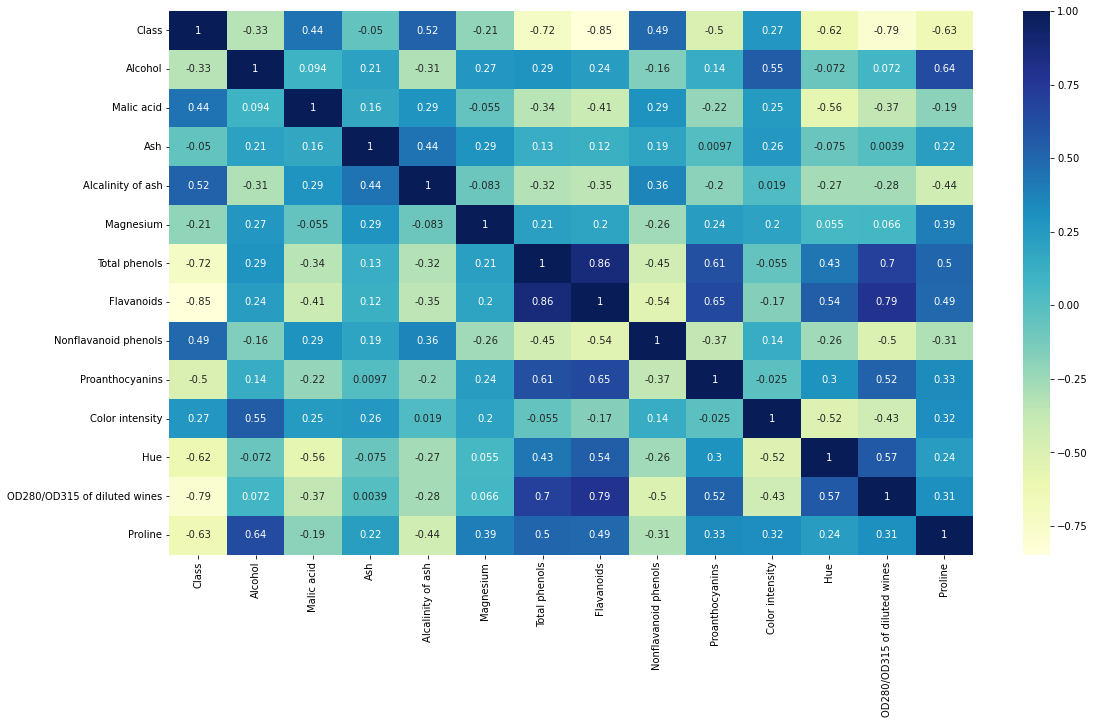

In [8]:
plt.figure(figsize=(18,10))
sns.heatmap(data.loc[:,columNames].corr(), annot=True, cmap='YlGnBu')

### Clases

In [9]:
# Imprimir las clases existentes en en conjunto de datos
print('Clases', np.unique(data['Class']))

Clases [1 2 3]


In [10]:
data['Class'].value_counts(dropna = False)

2    71
1    59
3    48
Name: Class, dtype: int64

In [11]:
X = data.loc[:, data.columns[(data.columns != 'Class')]]
y = data.loc[:, 'Class'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Clasificación

En esta sección se probarán diferentes algoritmos de clasificación para luego compararlos y determinar, de acuerdo a las métricas, cual es el mejor para este conjunto de datos.

### Regresión logística

In [26]:
# Variables para almacenar los resultados de las predicciones con 
# los diferentes algoritmos y parámetros
# la columna expected contine el valor esperado 
resultsTest = pd.DataFrame(y_test,columns=['expected'])
resultsTrain = pd.DataFrame(y_train,columns=['expected'])


# Función entrenar y probar con regresión logística.
# Grafica los resultados con un mapa de calor, algo similar
# a una matriz de confusión, pero este problema es multiclase. 
def logReg(paramC, row, axes):

    # Entrenamiento con regresión logística, 
    # Se establece C = paramC, que es el 
    # parámetro recibido en la función 
    log_reg = LogisticRegression(penalty='l1',
                            C=paramC,
                            solver='liblinear',
                            multi_class='ovr')
    log_reg.fit(X_train, y_train)

    # Nombre de la columna con las predicciones
    colName = 'log_reg_predicted_c'+str(paramC)

    #Título del gráfico
    title = 'Reg. Logística. C='+str(paramC) 

    # Se almacenan las predicciones, tanto las realizadas en el conjunto de
    # entrenamiento como en el conjunto de pruebas 
    resultsTest[colName] = log_reg.predict(X_test)
    resultsTrain[colName] = log_reg.predict(X_train)

    # Se obtienen las matrices de confusiones (Multiclase, por tener tres categorías)
    confTest = confusion_matrix(resultsTest['expected'], resultsTest[colName], labels=[1, 2, 3])
    confTraining = confusion_matrix(resultsTrain['expected'], resultsTrain[colName], labels=[1, 2, 3])

    # Graficar el mapa de calor izquierdo(Predicciones del Conjunto de pruebas)
    # la fila se recibe como parámetro
    hmap = sns.heatmap(ax=axes[row,0], data = confTest,cmap='Blues')
    hmap.set_xticklabels(labels=['C1','C2','C3'],rotation=0)
    hmap.set_yticklabels(labels=['C1','C2','C3'],rotation=0)
    hmap.set_title("(Test)"+title)
    xLabel = "Accuracy = " + str(round(accuracy_score(resultsTest['expected'], resultsTest[colName]),2))
    hmap.set_xlabel(xLabel)
    
    # Graficar el mapa de calor izquierdo(Predicciones del Conjunto de entrenamiento)
    # la fila se recibe como parámetro
    hmap = sns.heatmap(ax=axes[row,1], data = confTraining,cmap='Blues')
    hmap.set_xticklabels(labels=['C1','C2','C3'],rotation=0)
    hmap.set_yticklabels(labels=['C1','C2','C3'],rotation=0)
    hmap.set_title("(Training)"+title)
    xLabel = "Accuracy = " + str(round(accuracy_score(resultsTrain['expected'], resultsTrain[colName]),2))
    hmap.set_xlabel(xLabel)

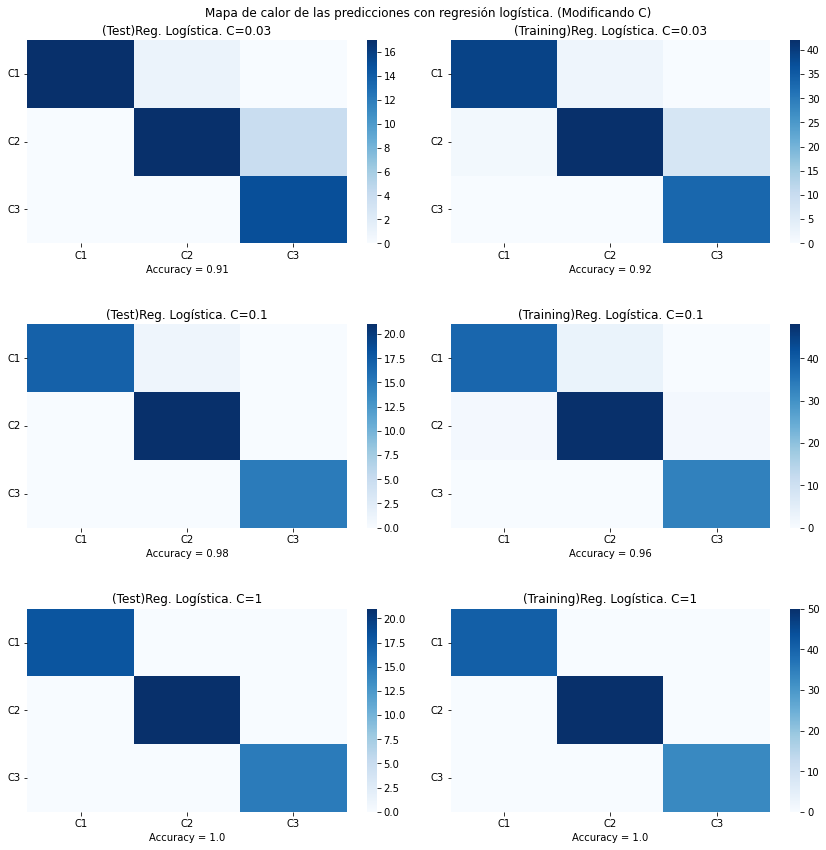

In [27]:
fig, axes = plt.subplots(3,2, figsize=(12,12))
logReg(0.03, 0, axes)
logReg(0.1,1, axes)
logReg(1,2, axes)
fig.suptitle('Mapa de calor de las predicciones con regresión logística. (Modificando C)')
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)


### KNN

In [87]:
def knnPred(n,row, axes):
    
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    
    # Nombre de la columna con las predicciones
    colName = 'log_reg_predicted_c'+str(n)

    #Título del gráfico
    title = 'KNN. n='+str(n) 

    # Se almacenan las predicciones, tanto las realizadas en el conjunto de
    # entrenamiento como en el conjunto de pruebas 
    resultsTest[colName] = knn.predict(X_test)
    resultsTrain[colName] = knn.predict(X_train)

    # Se obtienen las matrices de confusiones (Multiclase, por tener tres categorías)
    confTest = confusion_matrix(resultsTest['expected'], resultsTest[colName], labels=[1, 2, 3])
    confTraining = confusion_matrix(resultsTrain['expected'], resultsTrain[colName], labels=[1, 2, 3])

    # Graficar el mapa de calor izquierdo(Predicciones del Conjunto de pruebas)
    # la fila se recibe como parámetro
    hmap = sns.heatmap(ax=axes[row,0], data = confTest,cmap='Blues',annot=True)
    hmap.set_xticklabels(labels=['C1','C2','C3'],rotation=0)
    hmap.set_yticklabels(labels=['C1','C2','C3'],rotation=0)
    hmap.set_title("(Test)"+title)
    xLabel = "Accuracy = " + str(round(accuracy_score(resultsTest['expected'], resultsTest[colName]),2))
    hmap.set_xlabel(xLabel)

    # Graficar el mapa de calor izquierdo(Predicciones del Conjunto de entrenamiento)
    # la fila se recibe como parámetro
    hmap = sns.heatmap(ax=axes[row,1], data = confTraining,cmap='Blues',annot=True)
    hmap.set_xticklabels(labels=['C1','C2','C3'],rotation=0)
    hmap.set_yticklabels(labels=['C1','C2','C3'],rotation=0)
    hmap.set_title("(Training)"+title)
    xLabel = "Accuracy = " + str(round(accuracy_score(resultsTrain['expected'], resultsTrain[colName]),2))
    hmap.set_xlabel(xLabel)


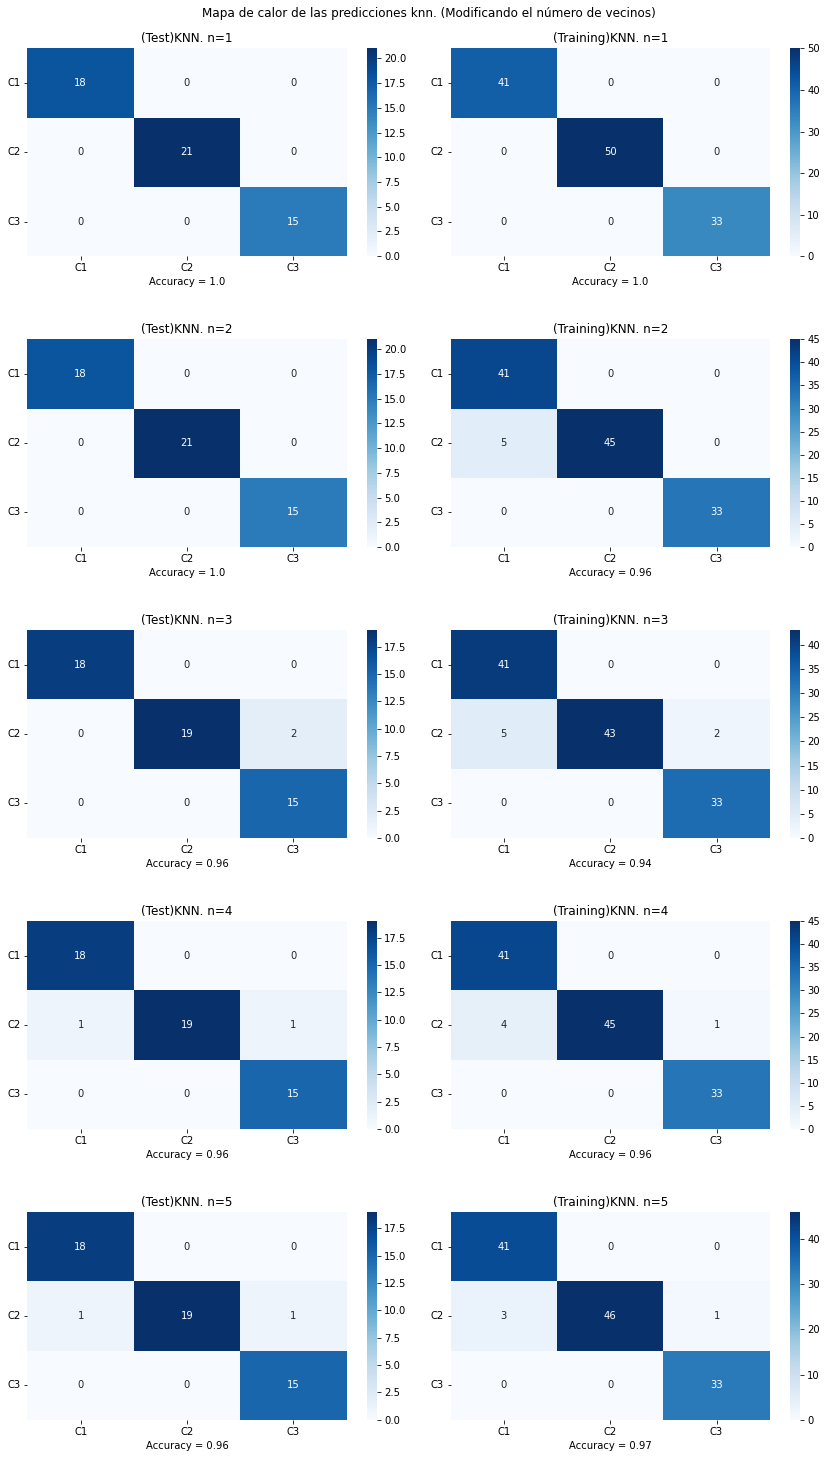

In [93]:
nProbes = 5
fig, axes = plt.subplots(nProbes,2, figsize=(12,20))

for i in range(0,nProbes):
    knnPred(i+1,i,axes)

fig.tight_layout()
fig.suptitle('Mapa de calor de las predicciones knn. (Modificando el número de vecinos)', y=1.01)
fig.subplots_adjust(hspace=0.4)

### Random Forest

## Respuestas a las preguntas planteadas

1. ¿Qué modelo funcionó mejor?



2. ¿Cuáles son las características más importantes de tus modelos? 



3. ¿Hay algún modelo que te haya gustado más y por qué?